In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pylab as plt

In [2]:
files_loc = os.path.expanduser(r"~/git/PipeDream/benchmarking/queries")
time_files = glob.glob(os.path.join(files_loc, "fpga_*.csv"))
res_files = glob.glob(os.path.join(files_loc, "q1out*.csv"))

In [3]:
df_time = pd.read_csv(time_files[0], header=None)
df_res = pd.read_csv(res_files[0], header=None)

In [4]:
data_path = os.path.expanduser(r"~/data/taxi_data_cleaned")
all_files = os.listdir(os.path.expanduser(data_path))

In [5]:
df = pd.DataFrame({"files":all_files, "count": df_res[0], "time": df_time[0] / (1000 * 1000)})
df.set_index("files", inplace=True)

In [6]:
df.head()

,count,time
files,,
yellow_tripdata_2011-06.csv,14092413,22.215828
yellow_tripdata_2011-02.csv,13380122,22.411802
yellow_tripdata_2019-09.csv,14387371,22.519684
yellow_tripdata_2017-02.csv,14294783,22.341600
yellow_tripdata_2017-09.csv,2074,32.472827


In [16]:
from multiprocessing import Pool, cpu_count
def get_count(f):
    fn = os.path.join(data_path, f)
    print(f"Reading: {f}")
    with open(fn, "r") as fd:
        l = fd.readlines()
    return len(l)

In [17]:
lngths = Pool(cpu_count()).map(get_count, all_files)

Reading: yellow_tripdata_2011-09.csv
Reading: yellow_tripdata_2011-06.csv
Reading: yellow_tripdata_2017-09.csv
Reading: yellow_tripdata_2019-10.csv
Reading: yellow_tripdata_2015-06.csv
Reading: yellow_tripdata_2015-04.csv
Reading: yellow_tripdata_2018-05.csv
Reading: yellow_tripdata_2016-07.csv
Reading: yellow_tripdata_2018-03.csv
Reading: yellow_tripdata_2012-07.csv
Reading: yellow_tripdata_2011-02.csv
Reading: yellow_tripdata_2019-09.csv
Reading: yellow_tripdata_2017-02.csv
Reading: yellow_tripdata_2012-04.csv
Reading: yellow_tripdata_2019-07.csv
Reading: yellow_tripdata_2010-08.csv
Reading: yellow_tripdata_2017-04.csv
Reading: yellow_tripdata_2014-12.csv
Reading: yellow_tripdata_2014-11.csv
Reading: yellow_tripdata_2012-03.csv
Reading: yellow_tripdata_2015-05.csv
Reading: yellow_tripdata_2010-07.csv
Reading: yellow_tripdata_2017-01.csv
Reading: yellow_tripdata_2015-12.csv
Reading: yellow_tripdata_2018-01.csv
Reading: yellow_tripdata_2009-11.csv
Reading: yellow_tripdata_2014-04.csv
R

In [19]:
df["real_count"] = lngths

In [24]:
df.head(n=100)

,count,time,real_count
files,,,
yellow_tripdata_2011-06.csv,14092413,22.215828,15097860
yellow_tripdata_2011-02.csv,13380122,22.411802,14612198
yellow_tripdata_2019-09.csv,14387371,22.519684,6567787
yellow_tripdata_2017-02.csv,14294783,22.341600,9168824
yellow_tripdata_2017-09.csv,2074,32.472827,8945458
...,...,...,...
yellow_tripdata_2012-05.csv,9168824,9.511710,15567525
yellow_tripdata_2012-06.csv,10294628,12.133109,15096468
yellow_tripdata_2018-09.csv,10046188,12.601911,8040133


In [23]:
df.to_csv(os.path.join(files_loc, "fpga_results.csv"), index=False)

In [3]:
df = pd.read_csv(os.path.join(files_loc, "fpga_results.csv"))

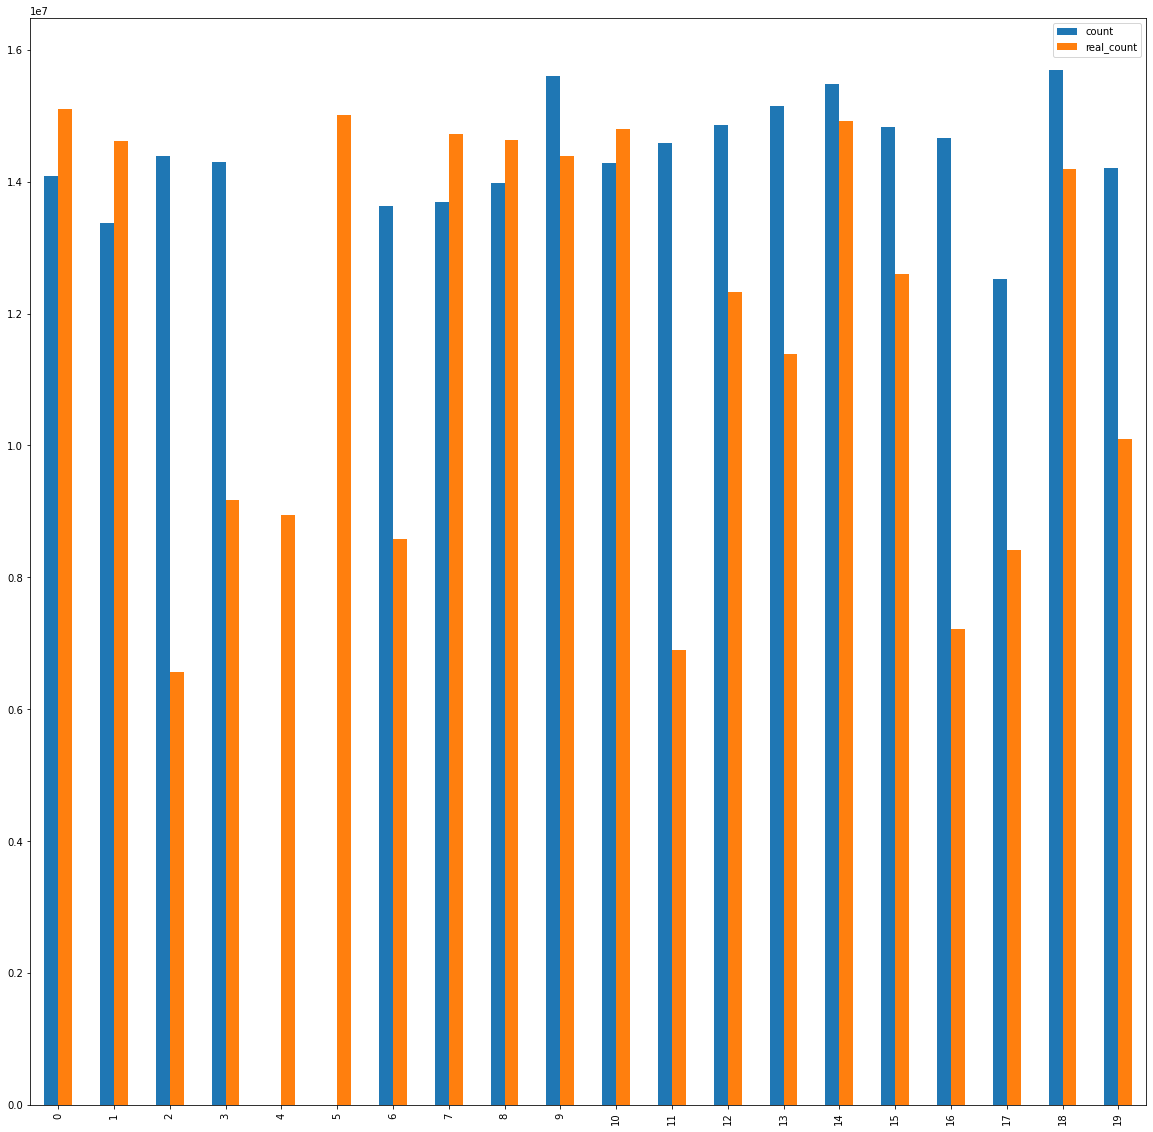

In [7]:
plt.rcParams["figure.figsize"] = 20, 20
df[:20][["count", "real_count"]].plot.bar()

In [ ]:
import matplo

In [26]:
!pip3 install matplotlib

    100% |████████████████████████████████| 12.4MB 127kB/s  eta 0:00:01
    100% |████████████████████████████████| 92kB 13.3MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/fc/4763e5f17ac6e7e7d55f377cde859ca1c5d5ac624441ab45315bc578aa9e/numpy-1.18.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
